<a href="https://colab.research.google.com/github/gsf31/python_data/blob/main/rmsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite o caminho para a pasta com os arquivos .dat: /content/dat-rmsd


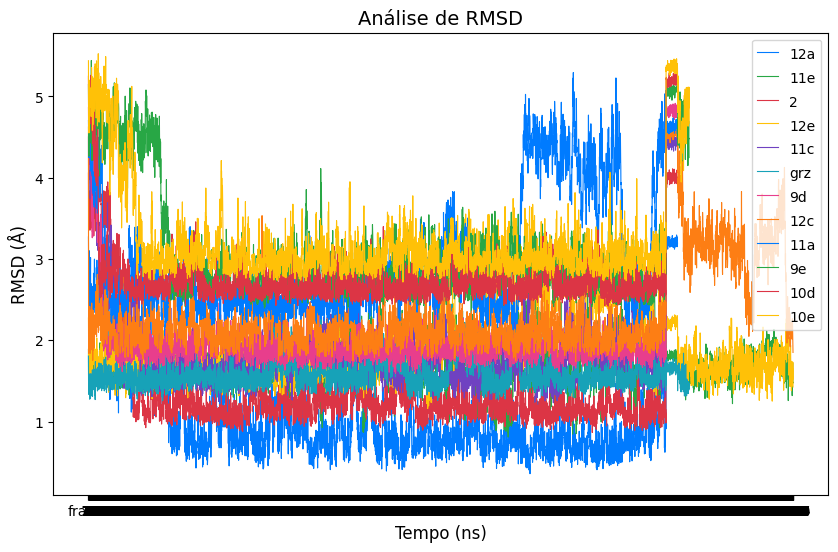

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Solicita ao usuário o caminho para a pasta contendo os arquivos .dat
caminho_da_pasta = input("Digite o caminho para a pasta com os arquivos .dat: ")

# Verifica se o caminho da pasta é válido
if not os.path.isdir(caminho_da_pasta):
    print(f"Erro: O caminho '{caminho_da_pasta}' não é válido.")
    exit()

# Paleta de cores vibrantes
cores_vibrantes = ['#007bff', '#28a745', '#dc3545', '#ffc107', '#6f42c1',
                   '#17a2b8', '#e83e8c', '#fd7e14']

# Configura o gráfico com fundo branco
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))

# Listas para armazenar as linhas e os nomes das legendas
linhas = []
nomes_legendas = []

# Plota os dados de cada arquivo .dat
for i, file in enumerate(glob.glob(os.path.join(caminho_da_pasta, "*.dat"))):
    df = pd.read_csv(file, delim_whitespace=True, header=None, names=["Tempo", "RMSD"])

    # Converte explicitamente a coluna "RMSD" para o tipo numérico
    df["RMSD"] = pd.to_numeric(df["RMSD"], errors='coerce')

    # Ajusta o deslocamento para maior sobreposição
    deslocamento_y = i * 0.2

    # Extrai a parte desejada do nome do arquivo para a legenda
    nome_legenda = os.path.splitext(os.path.basename(file))[0]
    nome_legenda = nome_legenda.split('-')[-1]

    # Plota com cores vibrantes
    linha, = ax.plot(df["Tempo"], df["RMSD"] + deslocamento_y,
                    color=cores_vibrantes[i % len(cores_vibrantes)],
                    linewidth=0.8,
                    label=nome_legenda)

    # Armazena a linha e o nome da legenda
    linhas.append(linha)
    nomes_legendas.append(nome_legenda)

# Define a legenda fora do loop
plt.legend(linhas, nomes_legendas,
           loc="best",
           handlelength=1.5,  # Largura da linha na legenda
           handleheight=1.5
          )

# Define os elementos do gráfico
plt.xlabel("Tempo (ns)", fontsize=12)
plt.ylabel("RMSD (Å)", fontsize=12)
plt.title("Análise de RMSD", fontsize=14)

# Salva a figura em alta resolução
plt.savefig("grafico_rmsd_cores_vibrantes.png", dpi=300, bbox_inches="tight")

# Mostra o gráfico
plt.show()